In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Label Encoder

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df["Gender"] = le.fit_transform(df["Gender"])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [6]:
df.corr()["Purchased"]

User ID            0.007120
Gender            -0.042469
Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Name: Purchased, dtype: float64

In [7]:
X = df.iloc[:,2:4]
y = df.iloc[:,-1]

In [8]:
X.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
X[:,0].std()

1.0

In [13]:
X[:,1].std()

1.0

In [28]:
X[:,1].min()

-1.6075056615492507

In [27]:
X[:,1].max()

2.3567499772898386

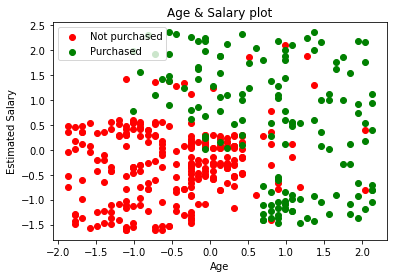

In [14]:
plt.scatter(X[y==0,0],X[y==0,1],color="red",label="Not purchased")
plt.scatter(X[y==1,0],X[y==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Age & Salary plot")
plt.show()

# Split the dataset into Training & Testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.75,random_state=50)

In [17]:
X_train.shape

(300, 2)

In [18]:
X_test.shape

(100, 2)

In [19]:
y_train.shape

(300,)

In [20]:
y_test.shape

(100,)

# Fitting the model

In [21]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()

In [22]:
lg_model.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = lg_model.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [41]:
y_test.values

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Accuracy Testing

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
cm = confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[68,  2],
       [13, 17]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred)

0.85

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        70
           1       0.89      0.57      0.69        30

    accuracy                           0.85       100
   macro avg       0.87      0.77      0.80       100
weighted avg       0.86      0.85      0.84       100



# Model Visualization

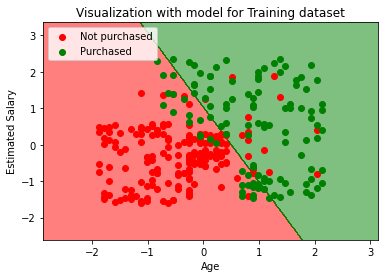

In [51]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, lg_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Training dataset")
plt.show()

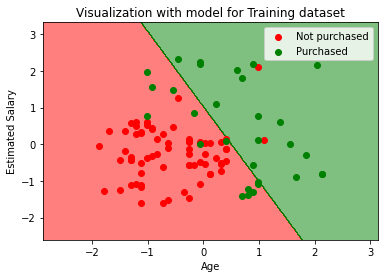

In [52]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, lg_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Training dataset")
plt.show()